In [60]:
import agentpy as ap
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import networkx as nx
#from tqdm import tqdm

In [61]:
parameters = {
    'population': 1000,
    'steps': 20000,
    'num_partners': 1,
    'mu': 0.5,
    'd':0.5,
    'number_of_neighbors': 2}



"""CREAMOS EL EDGELIST DEL GRAPH"""


graph = nx.barabasi_albert_graph(parameters['population'], parameters['number_of_neighbors'])
edgelist=pd.DataFrame(graph.edges)
edgelist=edgelist.rename(columns={0:'from',1:'to'})

In [64]:
#creamos una opinion uniformemente distribuida

"""DISTRIBUIMOS UNA OPINION ALEATORIA A LOS NODOS"""
opinion=[]
    
for x in range(len(graph.nodes)):
    opinion.append(random.uniform(0,1))
    
opinion=pd.DataFrame(opinion)#.rename(columns={0:'opinion'})
#opinion.head(5)

# Evolucion temporal de la opinion en la BA network

In [65]:
for x in range(parameters['steps']):


    """creamos otro dataframe que añadiremos en cada bucle con las opiniones actualizadas"""
    
    opinion1=pd.DataFrame()#reseteamos el opinion1 donde cargamos los cambios y los añadimos a opinion
    
    """seleccionamos un nodo y un vecino de ese nodo aleatoriamente"""
    
    nodo=random.choice(pd.DataFrame(graph.nodes)[0])#nodo al azar

    vecinos=pd.concat([edgelist[edgelist['from']==nodo], edgelist[edgelist['to']==nodo]],axis=0)
    indice=random.choice(vecinos.index)
    if int(vecinos[vecinos.index==indice]['from'])==int(nodo):
        vecino=vecinos[vecinos.index==indice]['to']    
    if int(vecinos[vecinos.index==indice]['to'])==int(nodo):
        vecino=vecinos[vecinos.index==indice]['from']

        
    """cogemos la ultima columna y la copiamos, para posteriormente cambiarle la opinion al nodo seleccionado"""
    
    opinion1=pd.DataFrame(opinion[x]) # Última columna)
    #hemos seleccionado vecino al azar 
    
    """definicion de la interacion entre nodos"""
    
    opinion_diff = abs(float(opinion1[opinion1.index == nodo][x].values) - float(opinion1[opinion1.index==int(vecino.values)][x].values))


    if float(opinion_diff) <= parameters['d']:
        opinion_change = parameters['mu'] * (float(opinion1[opinion1.index==nodo][x].values) - float(opinion1[opinion1.index==int(vecino.values)][x].values))
        opinion1.loc[opinion1.index==int(vecino.values),x] = float(opinion1[opinion1.index==int(vecino.values)].values) + opinion_change


    else:
        print('demasiado lejos para interacionar')
    

    """Ahora tenemos que unir el nuevo dataframe con una opinion actualizada al antiguo"""    

    opinion1=opinion1.rename(columns={x:len(opinion.columns)})
    opinion=pd.concat([opinion,opinion1],axis=1)
    #print('nodo   ',nodo,'   vecino   ', int(vecino.values))
    print(x)

0
demasiado lejos para interacionar
1
demasiado lejos para interacionar
2
3
4
5
6
demasiado lejos para interacionar
7
8
9
10
demasiado lejos para interacionar
11
demasiado lejos para interacionar
12
13
demasiado lejos para interacionar
14
15
16
demasiado lejos para interacionar
17
18
demasiado lejos para interacionar
19
20
21
demasiado lejos para interacionar
22
23
24
demasiado lejos para interacionar
25
26
demasiado lejos para interacionar
27
28
29
demasiado lejos para interacionar
30
31
demasiado lejos para interacionar
32
33
demasiado lejos para interacionar
34
demasiado lejos para interacionar
35
36
demasiado lejos para interacionar
37
38
39
40
41
demasiado lejos para interacionar
42
43
44
45
46
47
48
49
50
51
52
53
54
demasiado lejos para interacionar
55
demasiado lejos para interacionar
56
57
58
demasiado lejos para interacionar
59
60
61
demasiado lejos para interacionar
62
63
64
65
66
demasiado lejos para interacionar
67
68
69
70
demasiado lejos para interacionar
71
demasiado le

666
demasiado lejos para interacionar
667
demasiado lejos para interacionar
668
669
670
671
672
673
674
675
676
677
678
679
680
681
682
683
684
demasiado lejos para interacionar
685
demasiado lejos para interacionar
686
demasiado lejos para interacionar
687
688
689
690
691
692
693
demasiado lejos para interacionar
694
695
696
697
698
demasiado lejos para interacionar
699
demasiado lejos para interacionar
700
demasiado lejos para interacionar
701
702
703
demasiado lejos para interacionar
704
705
706
707
708
709
710
711
712
demasiado lejos para interacionar
713
714
715
716
717
718
719
720
721
722
demasiado lejos para interacionar
723
724
725
726
demasiado lejos para interacionar
727
demasiado lejos para interacionar
728
729
demasiado lejos para interacionar
730
731
732
733
734
735
736
737
demasiado lejos para interacionar
738
739
740
demasiado lejos para interacionar
741
742
743
744
745
746
747
748
749
750
751
752
753
754
755
756
757
758
demasiado lejos para interacionar
759
demasiado le

1316
1317
demasiado lejos para interacionar
1318
1319
1320
1321
demasiado lejos para interacionar
1322
1323
demasiado lejos para interacionar
1324
1325
1326
1327
demasiado lejos para interacionar
1328
1329
1330
1331
demasiado lejos para interacionar
1332
1333
1334
1335
demasiado lejos para interacionar
1336
1337
demasiado lejos para interacionar
1338
1339
1340
1341
demasiado lejos para interacionar
1342
1343
demasiado lejos para interacionar
1344
1345
1346
1347
1348
1349
1350
1351
1352
1353
1354
demasiado lejos para interacionar
1355
1356
1357
1358
demasiado lejos para interacionar
1359
demasiado lejos para interacionar
1360
demasiado lejos para interacionar
1361
1362
demasiado lejos para interacionar
1363
1364
1365
1366
1367
1368
1369
1370
1371
1372
1373
1374
1375
demasiado lejos para interacionar
1376
1377
demasiado lejos para interacionar
1378
1379
1380
demasiado lejos para interacionar
1381
demasiado lejos para interacionar
1382
1383
1384
1385
1386
1387
demasiado lejos para interac

1956
1957
1958
1959
1960
1961
1962
demasiado lejos para interacionar
1963
1964
1965
demasiado lejos para interacionar
1966
1967
demasiado lejos para interacionar
1968
1969
1970
1971
demasiado lejos para interacionar
1972
demasiado lejos para interacionar
1973
1974
demasiado lejos para interacionar
1975
1976
demasiado lejos para interacionar
1977
1978
demasiado lejos para interacionar
1979
demasiado lejos para interacionar
1980
1981
1982
1983
1984
1985
demasiado lejos para interacionar
1986
demasiado lejos para interacionar
1987
demasiado lejos para interacionar
1988
1989
1990
1991
1992
1993
1994
demasiado lejos para interacionar
1995
1996
1997
1998
demasiado lejos para interacionar
1999
2000
2001
2002
2003
2004
2005
demasiado lejos para interacionar
2006
2007
2008
2009
2010
demasiado lejos para interacionar
2011
2012
2013
2014
2015
2016
2017
2018
demasiado lejos para interacionar
2019
2020
2021
2022
demasiado lejos para interacionar
2023
demasiado lejos para interacionar
2024
2025
dema

2728
2729
2730
2731
2732
2733
demasiado lejos para interacionar
2734
2735
2736
2737
2738
2739
2740
2741
demasiado lejos para interacionar
2742
2743
2744
2745
2746
demasiado lejos para interacionar
2747
2748
2749
2750
2751
2752
2753
2754
2755
2756
2757
2758
2759
demasiado lejos para interacionar
2760
2761
2762
2763
2764
demasiado lejos para interacionar
2765
2766
2767
2768
2769
2770
2771
2772
2773
2774
2775
2776
2777
2778
2779
2780
2781
2782
2783
2784
2785
2786
2787
2788
2789
2790
2791
2792
demasiado lejos para interacionar
2793
2794
2795
2796
2797
2798
demasiado lejos para interacionar
2799
2800
demasiado lejos para interacionar
2801
2802
2803
2804
demasiado lejos para interacionar
2805
2806
2807
2808
2809
2810
2811
2812
2813
2814
2815
demasiado lejos para interacionar
2816
2817
demasiado lejos para interacionar
2818
2819
2820
2821
2822
demasiado lejos para interacionar
2823
2824
demasiado lejos para interacionar
2825
2826
2827
demasiado lejos para interacionar
2828
2829
2830
demasiado

3499
demasiado lejos para interacionar
3500
3501
demasiado lejos para interacionar
3502
3503
3504
3505
demasiado lejos para interacionar
3506
3507
3508
3509
3510
demasiado lejos para interacionar
3511
3512
3513
3514
3515
3516
3517
3518
3519
3520
3521
3522
3523
3524
3525
3526
3527
demasiado lejos para interacionar
3528
3529
3530
3531
3532
demasiado lejos para interacionar
3533
demasiado lejos para interacionar
3534
demasiado lejos para interacionar
3535
demasiado lejos para interacionar
3536
demasiado lejos para interacionar
3537
3538
demasiado lejos para interacionar
3539
demasiado lejos para interacionar
3540
3541
3542
3543
demasiado lejos para interacionar
3544
3545
3546
3547
3548
3549
3550
3551
3552
3553
3554
demasiado lejos para interacionar
3555
3556
3557
demasiado lejos para interacionar
3558
demasiado lejos para interacionar
3559
3560
3561
3562
3563
3564
3565
3566
3567
3568
3569
3570
3571
3572
3573
3574
3575
3576
3577
3578
3579
3580
3581
3582
3583
3584
3585
3586
3587
3588
3589
3

4412
4413
4414
4415
demasiado lejos para interacionar
4416
demasiado lejos para interacionar
4417
4418
4419
demasiado lejos para interacionar
4420
4421
4422
4423
4424
4425
4426
demasiado lejos para interacionar
4427
4428
4429
4430
4431
4432
4433
demasiado lejos para interacionar
4434
demasiado lejos para interacionar
4435
4436
4437
4438
demasiado lejos para interacionar
4439
4440
demasiado lejos para interacionar
4441
demasiado lejos para interacionar
4442
4443
demasiado lejos para interacionar
4444
4445
demasiado lejos para interacionar
4446
demasiado lejos para interacionar
4447
4448
4449
4450
4451
4452
4453
4454
4455
demasiado lejos para interacionar
4456
4457
4458
4459
4460
4461
demasiado lejos para interacionar
4462
4463
demasiado lejos para interacionar
4464
4465
4466
4467
4468
4469
4470
demasiado lejos para interacionar
4471
4472
4473
4474
4475
4476
4477
4478
4479
4480
4481
demasiado lejos para interacionar
4482
4483
4484
4485
4486
4487
4488
4489
4490
4491
demasiado lejos para i

5319
5320
5321
5322
5323
5324
5325
5326
5327
5328
5329
5330
5331
demasiado lejos para interacionar
5332
5333
5334
5335
5336
5337
demasiado lejos para interacionar
5338
5339
demasiado lejos para interacionar
5340
5341
5342
5343
5344
5345
5346
5347
5348
demasiado lejos para interacionar
5349
5350
5351
5352
5353
5354
5355
5356
5357
5358
5359
5360
demasiado lejos para interacionar
5361
5362
5363
5364
5365
5366
5367
5368
5369
5370
5371
5372
5373
5374
5375
5376
5377
5378
demasiado lejos para interacionar
5379
5380
5381
5382
5383
5384
5385
demasiado lejos para interacionar
5386
5387
5388
5389
5390
5391
5392
5393
5394
5395
5396
5397
demasiado lejos para interacionar
5398
5399
5400
5401
5402
5403
5404
5405
5406
5407
5408
5409
5410
demasiado lejos para interacionar
5411
5412
5413
5414
demasiado lejos para interacionar
5415
demasiado lejos para interacionar
5416
5417
5418
demasiado lejos para interacionar
5419
5420
5421
5422
demasiado lejos para interacionar
5423
5424
5425
5426
5427
5428
5429
543

6238
6239
6240
6241
6242
demasiado lejos para interacionar
6243
6244
6245
6246
6247
6248
6249
6250
6251
6252
6253
6254
6255
6256
6257
6258
demasiado lejos para interacionar
6259
6260
6261
6262
demasiado lejos para interacionar
6263
6264
6265
6266
6267
6268
6269
6270
demasiado lejos para interacionar
6271
6272
6273
6274
6275
6276
6277
6278
6279
6280
6281
6282
6283
6284
6285
6286
6287
6288
6289
6290
6291
6292
6293
6294
6295
6296
6297
6298
6299
6300
6301
6302
6303
6304
6305
6306
6307
6308
6309
6310
6311
demasiado lejos para interacionar
6312
demasiado lejos para interacionar
6313
6314
6315
6316
6317
6318
6319
6320
6321
6322
6323
6324
6325
6326
6327
6328
6329
demasiado lejos para interacionar
6330
6331
demasiado lejos para interacionar
6332
6333
6334
6335
6336
6337
demasiado lejos para interacionar
6338
6339
6340
6341
6342
6343
6344
6345
6346
6347
demasiado lejos para interacionar
6348
6349
6350
6351
6352
6353
demasiado lejos para interacionar
6354
6355
6356
6357
6358
6359
demasiado lejos 

7231
7232
7233
7234
7235
7236
7237
7238
7239
7240
7241
7242
7243
7244
7245
7246
7247
7248
7249
7250
demasiado lejos para interacionar
7251
7252
7253
7254
7255
7256
7257
7258
7259
7260
7261
demasiado lejos para interacionar
7262
7263
7264
7265
7266
7267
7268
7269
7270
7271
7272
demasiado lejos para interacionar
7273
7274
7275
demasiado lejos para interacionar
7276
7277
7278
7279
7280
demasiado lejos para interacionar
7281
demasiado lejos para interacionar
7282
7283
7284
7285
7286
7287
7288
7289
7290
7291
7292
7293
7294
7295
7296
demasiado lejos para interacionar
7297
7298
demasiado lejos para interacionar
7299
7300
7301
7302
7303
7304
7305
7306
7307
7308
demasiado lejos para interacionar
7309
7310
7311
7312
7313
7314
7315
7316
demasiado lejos para interacionar
7317
7318
7319
7320
7321
7322
7323
7324
7325
7326
7327
7328
7329
7330
7331
7332
7333
demasiado lejos para interacionar
7334
7335
7336
7337
demasiado lejos para interacionar
7338
7339
7340
7341
7342
demasiado lejos para interaciona

8121
demasiado lejos para interacionar
8122
8123
8124
8125
8126
8127
demasiado lejos para interacionar
8128
8129
8130
8131
8132
demasiado lejos para interacionar
8133
8134
demasiado lejos para interacionar
8135
8136
8137
8138
8139
8140
8141
8142
8143
8144
8145
8146
8147
8148
8149
8150
8151
8152
8153
8154
8155
8156
8157
8158
8159
8160
8161
8162
8163
8164
8165
demasiado lejos para interacionar
8166
8167
8168
8169
8170
8171
8172
8173
8174
8175
demasiado lejos para interacionar
8176
8177
demasiado lejos para interacionar
8178
8179
8180
8181
8182
8183
8184
8185
8186
8187
8188
8189
8190
8191
8192
8193
demasiado lejos para interacionar
8194
8195
8196
8197
8198
8199
8200
8201
8202
8203
8204
8205
8206
8207
8208
8209
8210
8211
8212
8213
demasiado lejos para interacionar
8214
8215
8216
8217
8218
8219
8220
demasiado lejos para interacionar
8221
8222
8223
8224
demasiado lejos para interacionar
8225
8226
8227
8228
8229
8230
8231
8232
8233
8234
8235
demasiado lejos para interacionar
8236
8237
8238
de

9081
9082
9083
9084
9085
9086
9087
9088
9089
9090
demasiado lejos para interacionar
9091
9092
9093
9094
9095
9096
9097
9098
9099
9100
9101
9102
9103
9104
9105
9106
9107
9108
9109
9110
9111
9112
9113
9114
9115
9116
9117
9118
9119
9120
9121
9122
9123
9124
9125
9126
9127
9128
demasiado lejos para interacionar
9129
9130
9131
9132
9133
9134
9135
9136
9137
9138
9139
9140
9141
9142
9143
9144
9145
9146
9147
demasiado lejos para interacionar
9148
9149
9150
9151
9152
9153
demasiado lejos para interacionar
9154
demasiado lejos para interacionar
9155
9156
9157
demasiado lejos para interacionar
9158
9159
9160
9161
9162
9163
9164
demasiado lejos para interacionar
9165
demasiado lejos para interacionar
9166
9167
9168
9169
9170
9171
9172
9173
9174
9175
9176
9177
9178
9179
9180
9181
9182
9183
9184
9185
9186
9187
9188
9189
9190
9191
9192
9193
9194
9195
9196
9197
9198
9199
9200
9201
9202
9203
9204
9205
9206
9207
9208
9209
9210
9211
demasiado lejos para interacionar
9212
9213
9214
9215
9216
9217
9218
9219

10017
10018
10019
10020
10021
10022
demasiado lejos para interacionar
10023
10024
10025
10026
10027
10028
10029
10030
10031
10032
demasiado lejos para interacionar
10033
10034
10035
demasiado lejos para interacionar
10036
10037
10038
demasiado lejos para interacionar
10039
demasiado lejos para interacionar
10040
10041
10042
10043
10044
10045
10046
10047
10048
demasiado lejos para interacionar
10049
10050
10051
10052
10053
10054
10055
10056
10057
10058
10059
10060
10061
10062
10063
10064
10065
10066
10067
10068
10069
10070
10071
10072
10073
10074
10075
10076
10077
10078
10079
10080
10081
10082
10083
10084
10085
10086
demasiado lejos para interacionar
10087
demasiado lejos para interacionar
10088
10089
demasiado lejos para interacionar
10090
demasiado lejos para interacionar
10091
10092
10093
10094
10095
10096
10097
10098
10099
10100
demasiado lejos para interacionar
10101
10102
demasiado lejos para interacionar
10103
10104
10105
10106
10107
10108
10109
10110
demasiado lejos para interac

10918
10919
10920
demasiado lejos para interacionar
10921
10922
10923
10924
10925
10926
10927
10928
10929
10930
demasiado lejos para interacionar
10931
10932
10933
10934
10935
10936
10937
10938
10939
10940
10941
10942
10943
10944
10945
10946
10947
demasiado lejos para interacionar
10948
10949
10950
10951
10952
10953
10954
10955
demasiado lejos para interacionar
10956
10957
10958
10959
10960
10961
10962
10963
10964
demasiado lejos para interacionar
10965
10966
10967
10968
10969
10970
10971
10972
10973
10974
10975
10976
10977
10978
10979
10980
10981
10982
10983
10984
10985
10986
10987
10988
10989
10990
10991
10992
10993
10994
10995
10996
10997
10998
10999
11000
11001
11002
11003
11004
11005
11006
11007
11008
11009
11010
11011
11012
11013
11014
11015
demasiado lejos para interacionar
11016
11017
11018
11019
11020
11021
11022
11023
11024
11025
11026
11027
11028
11029
11030
11031
11032
11033
11034
11035
11036
demasiado lejos para interacionar
11037
11038
11039
demasiado lejos para interacio

11910
11911
11912
11913
11914
11915
11916
11917
11918
11919
11920
11921
11922
11923
demasiado lejos para interacionar
11924
11925
11926
11927
11928
11929
11930
11931
11932
11933
11934
11935
11936
11937
11938
demasiado lejos para interacionar
11939
11940
11941
11942
11943
demasiado lejos para interacionar
11944
11945
11946
11947
11948
11949
11950
11951
11952
11953
11954
11955
11956
11957
11958
11959
11960
11961
11962
11963
11964
11965
11966
11967
11968
11969
11970
11971
11972
11973
11974
11975
11976
11977
11978
11979
11980
11981
11982
11983
11984
11985
11986
11987
demasiado lejos para interacionar
11988
11989
11990
11991
11992
11993
11994
11995
11996
11997
11998
11999
12000
12001
12002
12003
12004
12005
12006
12007
12008
12009
12010
12011
demasiado lejos para interacionar
12012
12013
12014
12015
12016
12017
12018
12019
12020
12021
12022
12023
12024
12025
12026
12027
12028
12029
12030
12031
12032
12033
12034
12035
12036
12037
12038
12039
12040
12041
12042
12043
12044
12045
12046
12047
12

12945
12946
12947
12948
12949
12950
12951
12952
12953
12954
12955
12956
12957
12958
12959
12960
12961
12962
12963
12964
12965
demasiado lejos para interacionar
12966
12967
12968
12969
12970
12971
12972
12973
demasiado lejos para interacionar
12974
12975
12976
12977
12978
12979
demasiado lejos para interacionar
12980
12981
12982
12983
12984
12985
12986
12987
12988
12989
12990
12991
12992
12993
12994
12995
12996
12997
12998
12999
13000
13001
13002
demasiado lejos para interacionar
13003
13004
13005
13006
13007
13008
13009
13010
13011
demasiado lejos para interacionar
13012
13013
13014
13015
13016
13017
13018
13019
13020
13021
demasiado lejos para interacionar
13022
13023
13024
13025
13026
13027
13028
13029
13030
13031
13032
13033
13034
13035
13036
13037
13038
13039
13040
13041
13042
13043
13044
13045
13046
13047
13048
13049
13050
13051
13052
13053
13054
13055
13056
13057
13058
13059
13060
13061
13062
13063
13064
13065
13066
13067
13068
13069
13070
13071
13072
13073
13074
13075
13076
1307

14039
14040
14041
14042
14043
14044
14045
14046
14047
14048
14049
14050
14051
14052
14053
14054
14055
14056
14057
14058
14059
14060
14061
14062
14063
14064
14065
14066
14067
14068
14069
14070
14071
14072
14073
14074
14075
14076
14077
14078
demasiado lejos para interacionar
14079
14080
14081
14082
14083
14084
demasiado lejos para interacionar
14085
14086
14087
14088
14089
14090
14091
14092
14093
14094
14095
demasiado lejos para interacionar
14096
14097
14098
14099
14100
14101
14102
14103
14104
14105
14106
14107
14108
14109
14110
14111
14112
14113
14114
14115
14116
14117
14118
14119
14120
14121
14122
14123
14124
14125
14126
14127
14128
14129
14130
14131
14132
14133
14134
demasiado lejos para interacionar
14135
14136
14137
14138
14139
14140
14141
14142
14143
14144
14145
14146
14147
14148
14149
14150
14151
14152
14153
14154
14155
14156
14157
14158
14159
14160
14161
14162
14163
14164
14165
14166
14167
14168
14169
14170
14171
14172
14173
14174
14175
14176
14177
14178
14179
14180
14181
14182


15119
15120
15121
15122
15123
15124
15125
15126
15127
demasiado lejos para interacionar
15128
15129
15130
demasiado lejos para interacionar
15131
demasiado lejos para interacionar
15132
15133
15134
15135
demasiado lejos para interacionar
15136
demasiado lejos para interacionar
15137
15138
15139
15140
15141
15142
15143
15144
15145
15146
demasiado lejos para interacionar
15147
15148
15149
15150
15151
15152
15153
15154
15155
15156
15157
15158
15159
15160
demasiado lejos para interacionar
15161
15162
15163
15164
15165
15166
demasiado lejos para interacionar
15167
demasiado lejos para interacionar
15168
15169
15170
15171
15172
15173
15174
15175
15176
15177
15178
15179
15180
15181
15182
15183
15184
15185
15186
15187
15188
15189
15190
15191
15192
15193
15194
15195
15196
15197
15198
15199
15200
15201
15202
15203
15204
15205
15206
15207
15208
15209
15210
15211
15212
15213
15214
demasiado lejos para interacionar
15215
15216
15217
15218
15219
15220
15221
15222
15223
15224
15225
15226
15227
15228


16196
16197
demasiado lejos para interacionar
16198
16199
16200
demasiado lejos para interacionar
16201
16202
16203
16204
16205
16206
16207
16208
16209
16210
16211
16212
16213
16214
16215
16216
16217
16218
16219
16220
16221
16222
16223
16224
16225
demasiado lejos para interacionar
16226
16227
16228
16229
16230
16231
16232
16233
16234
16235
16236
16237
16238
16239
demasiado lejos para interacionar
16240
16241
16242
16243
16244
16245
16246
16247
16248
16249
16250
16251
16252
16253
16254
16255
16256
16257
16258
16259
16260
16261
16262
16263
demasiado lejos para interacionar
16264
16265
16266
16267
16268
16269
16270
16271
16272
16273
16274
16275
16276
16277
16278
16279
16280
16281
16282
16283
demasiado lejos para interacionar
16284
16285
16286
16287
16288
16289
16290
16291
16292
16293
16294
16295
16296
16297
16298
16299
16300
16301
16302
16303
16304
16305
16306
16307
16308
16309
16310
16311
16312
16313
16314
16315
16316
16317
16318
16319
16320
16321
16322
16323
16324
16325
16326
16327
1632

17335
demasiado lejos para interacionar
17336
17337
17338
17339
17340
17341
17342
17343
17344
17345
17346
17347
17348
17349
17350
17351
demasiado lejos para interacionar
17352
17353
17354
17355
17356
17357
17358
17359
17360
17361
demasiado lejos para interacionar
17362
17363
17364
17365
17366
17367
17368
17369
17370
17371
17372
17373
17374
17375
17376
17377
17378
demasiado lejos para interacionar
17379
17380
17381
17382
17383
17384
17385
17386
17387
17388
17389
17390
17391
17392
17393
17394
17395
17396
17397
17398
17399
17400
17401
17402
17403
17404
17405
17406
17407
17408
17409
17410
17411
17412
17413
17414
17415
17416
17417
17418
17419
17420
demasiado lejos para interacionar
17421
17422
17423
17424
17425
17426
17427
17428
17429
17430
17431
17432
17433
17434
17435
17436
17437
17438
17439
17440
demasiado lejos para interacionar
17441
17442
17443
17444
17445
17446
17447
demasiado lejos para interacionar
17448
17449
17450
17451
17452
17453
17454
17455
17456
17457
17458
17459
17460
17461


18469
18470
18471
18472
18473
18474
18475
18476
18477
18478
18479
18480
18481
18482
18483
18484
18485
18486
18487
18488
18489
18490
18491
18492
18493
18494
18495
18496
18497
18498
18499
18500
18501
18502
18503
18504
18505
18506
18507
18508
18509
18510
18511
18512
18513
18514
18515
18516
18517
18518
18519
18520
18521
18522
18523
18524
18525
18526
18527
18528
18529
18530
18531
18532
18533
18534
18535
18536
18537
18538
18539
18540
18541
18542
18543
18544
18545
18546
18547
18548
18549
18550
18551
18552
18553
18554
18555
18556
18557
18558
18559
18560
18561
18562
18563
18564
18565
demasiado lejos para interacionar
18566
18567
18568
18569
18570
18571
18572
18573
18574
18575
18576
18577
18578
18579
18580
18581
18582
18583
18584
18585
18586
18587
18588
demasiado lejos para interacionar
18589
18590
18591
18592
18593
18594
demasiado lejos para interacionar
18595
18596
18597
18598
18599
18600
18601
18602
18603
18604
18605
18606
18607
18608
18609
18610
demasiado lejos para interacionar
18611
18612


19676
19677
19678
19679
19680
19681
19682
19683
19684
19685
19686
19687
19688
19689
19690
19691
19692
19693
19694
19695
19696
19697
19698
19699
19700
19701
19702
19703
19704
19705
19706
19707
19708
demasiado lejos para interacionar
19709
19710
19711
19712
19713
19714
19715
19716
19717
19718
19719
19720
19721
19722
19723
19724
19725
19726
19727
19728
19729
19730
19731
19732
19733
19734
19735
19736
19737
19738
19739
19740
19741
19742
19743
19744
19745
19746
19747
19748
19749
19750
19751
19752
19753
19754
19755
19756
19757
19758
19759
19760
19761
19762
19763
19764
19765
19766
demasiado lejos para interacionar
19767
19768
19769
19770
19771
19772
19773
19774
19775
19776
19777
demasiado lejos para interacionar
19778
19779
19780
19781
19782
19783
19784
19785
19786
19787
19788
19789
19790
19791
19792
19793
19794
19795
19796
demasiado lejos para interacionar
19797
19798
19799
19800
19801
19802
19803
19804
19805
19806
19807
19808
19809
19810
19811
19812
19813
19814
19815
19816
demasiado lejos pa

In [66]:
print('opinion antes   ',float(opinion[opinion.index==int(vecino.values)][0].values),'opinion despues  ',float(opinion1[opinion1.index==int(vecino.values)].values))
print('nodo   ',nodo,'   vecino   ', int(vecino.values))

opinion antes    0.08027629031258654 opinion despues   0.4565400810067094
nodo    600    vecino    911


Text(0.5, 0, 'initial opinion')

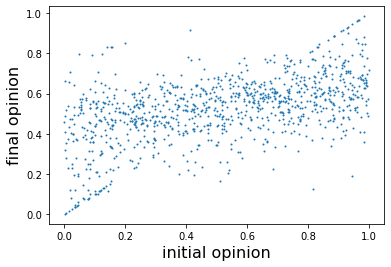

In [67]:
plt.scatter(opinion[0],opinion[parameters['steps']], s=1)
#plt.scatter(opinion[6978],opinion[16977], s=1)

#finalopinion vs initial opinion 
plt.ylabel("final opinion", size = 16)
plt.xlabel("initial opinion", size = 16)
  

In [68]:
opinion

,0,1,2,3,4,5,6,7,8,9,...,19991,19992,19993,19994,19995,19996,19997,19998,19999,20000
0,0.032539,0.032539,0.032539,0.032539,0.032539,0.032539,0.032539,0.032539,0.032539,0.032539,...,0.642053,0.642053,0.642053,0.642053,0.642053,0.642053,0.642053,0.642053,0.642053,0.642053
1,0.735773,0.735773,0.735773,0.735773,0.735773,0.735773,0.735773,0.735773,0.735773,0.735773,...,0.606960,0.606960,0.606960,0.606960,0.606960,0.606960,0.606960,0.606960,0.606960,0.606960
2,0.709496,0.709496,0.709496,0.709496,0.709496,0.709496,0.709496,0.709496,0.709496,0.709496,...,0.592841,0.592841,0.592841,0.592841,0.592841,0.592841,0.592841,0.592841,0.592841,0.592841
3,0.759919,0.759919,0.759919,0.759919,0.759919,0.759919,0.759919,0.759919,0.759919,0.759919,...,0.457292,0.457292,0.457292,0.546712,0.546712,0.546712,0.546712,0.677352,0.677352,0.677352
4,0.102026,0.102026,0.102026,0.102026,0.102026,0.102026,0.102026,0.102026,0.102026,0.102026,...,0.440848,0.440848,0.440848,0.440848,0.440848,0.440848,0.440848,0.440848,0.440848,0.440848
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.540181,0.540181,0.540181,0.540181,0.540181,0.540181,0.540181,0.540181,0.540181,0.540181,...,0.667164,0.667164,0.667164,0.667164,0.667164,0.667164,0.667164,0.667164,0.667164,0.667164
996,0.478493,0.478493,0.478493,0.478493,0.478493,0.478493,0.478493,0.478493,0.478493,0.478493,...,0.441501,0.441501,0.441501,0.441501,0.441501,0.441501,0.441501,0.441501,0.441501,0.441501
997,0.062742,0.062742,0.062742,0.062742,0.062742,0.062742,0.062742,0.062742,0.062742,0.062742,...,0.079641,0.079641,0.079641,0.079641,0.079641,0.079641,0.079641,0.079641,0.079641,0.079641
998,0.228129,0.228129,0.228129,0.228129,0.228129,0.228129,0.228129,0.228129,0.228129,0.228129,...,0.228129,0.228129,0.228129,0.228129,0.228129,0.228129,0.228129,0.228129,0.228129,0.228129


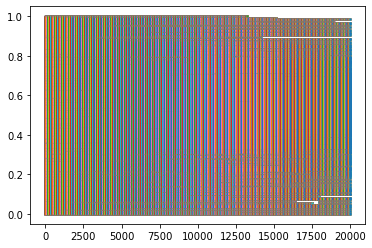

In [69]:
for x in range(len(opinion.columns)):
    A=[]
    for i in range(len(opinion)):
        A.append(x)
    plt.scatter(A,opinion[x], s=1)
